#Sense-making NLP Project

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('hls',12)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt 

# Data

We collected data from reddit from 2011-2021 with a PushShift scrape of "instagram algorithm" "ig algorithm" and "ig algo". We then narrowed our data to the top subreddits in the collection, as there was a lot of random crap. Here are the comment threads as well as original posts (unlinked at this time) that we labeled. While we tried to go back and agree, some are still unclean. They are multilabel, with the order mattering. We labeled as sensemaking, problem, or advertisment (ad). For exploratory purposes, label1 is likely the cleanest.

In [ ]:
comments = pd.read_csv("sample_data/comments_labeled.csv")
submissions = pd.read_csv("sample_data/submissions_labeled.csv")
comments.rename(columns={'Label..Yim': 'label1', 'Label...Dev': 'label2', 'Label...Joseph': 'label3','Label...Xiaobing': 'label4', 'Label...Nayan': 'label5'}, inplace=True)
submissions.rename(columns={'Label..Yim': 'label1', 'Label...Dev': 'label2', 'Label...Joseph': 'label3','Label...Xiaobing': 'label4'}, inplace=True)

comments["Type"] = "comments"
submissions["Type"] = "submissions"

data = pd.DataFrame(pd.concat([comments,submissions]))


In [ ]:
data.head(10)

,N,Post,Subreddit,Keyword,label5,Date_UTC,Date,label4,label2,label3,Type,label1,Title
0,705,Hey so for whatever reason when pulling in dat...,Instagram,"""instagram algorithm""",NaN,1609645939,2021-01-03 3:52:19,sensemaking,NaN,NaN,comments,NaN,NaN
1,704,the instagram algorithm prioritises accounts w...,Instagram,"""instagram algorithm""",NaN,1609696209,2021-01-03 17:50:09,sensemaking,NaN,NaN,comments,NaN,NaN
2,701,This is why so many instagram famous artists s...,ArtistLounge,"""instagram algorithm""",NaN,1609757800,2021-01-04 10:56:40,sensemaking,NaN,NaN,comments,NaN,NaN
3,699,"Poor girl, she's probably just trying to help ...",thebachelor,"""instagram algorithm""",NaN,1609787177,2021-01-04 19:06:17,sensemaking,sensemaking,sensemaking,comments,NaN,NaN
4,698,Hmm it could be to lower the bar for others to...,thebachelor,"""instagram algorithm""",NaN,1609795460,2021-01-04 21:24:20,sensemaking,NaN,NaN,comments,NaN,NaN
5,697,I really think it’s about the Instagram algori...,thebachelor,"""instagram algorithm""",NaN,1609795718,2021-01-04 21:28:38,sensemaking,NaN,NaN,comments,NaN,NaN
6,694,100% true. I could easily pump out art day aft...,ArtistLounge,"""instagram algorithm""",NaN,1609859068,2021-01-05 15:04:28,problem,problem,problem,comments,NaN,NaN
7,687,I have researched the Instagram algorithm earl...,InstagramMarketing,"""instagram algorithm""",NaN,1610177693,2021-01-09 7:34:53,sensemaking,NaN,NaN,comments,NaN,NaN
8,685,I’ve tried several and I cant even remember th...,Instagram,"""instagram algorithm""",NaN,1610199919,2021-01-09 13:45:19,problem,NaN,NaN,comments,NaN,NaN
9,677,Your work isn't bad at all. You know what you'...,ArtistLounge,"""instagram algorithm""",NaN,1610408074,2021-01-11 23:34:34,sensemaking,NaN,NaN,comments,NaN,NaN


# Data Cleaning

In [ ]:
final_data = data[data['Type'] == 'submissions']
final_data = final_data[final_data['label1'].notna()]
final_data['label'] = final_data['label1']
final_data_comments = data[data['Type'] == 'comments']
final_data_comments['label'] = final_data_comments['label4'].fillna(final_data_comments['label5'])

<ipython-input-6-5750ca7ed4a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_comments['label'] = final_data_comments['label4'].fillna(final_data_comments['label5'])


In [ ]:
data = pd.DataFrame(pd.concat([final_data,final_data_comments]))

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
# we need to drop NA
# make categorical

data = data[data['label'].notna()]
data.tail(10)
# extract year from date

,N,Post,Subreddit,Keyword,label5,Date_UTC,Date,label4,label2,label3,Type,label1,Title,label
1758,1,Everything is the algorithm. People fool them...,Instagram,"""Instagram's algorithm""",NaN,1609068293,2020-12-27 11:24:53,problem,NaN,NaN,comments,NaN,NaN,problem
1763,0,&gt;Art sites don't attract non-artists\n\nYes...,ArtistLounge,"""Instagram's algorithm""",NaN,1609169732,2020-12-28 15:35:32,problem,problem,problem,comments,NaN,NaN,problem
1764,0,true of many bloggers these days tbh. no creat...,blogsnark,"""ig algorithm""",NaN,1545748894,2018-12-25 14:41:34,problem,problem,problem,comments,NaN,NaN,problem
1765,0,"As an admin of a feature account, what grabs y...",socialmedia,"""ig algorithm""",NaN,1482949852,2016-12-28 18:30:52,problem,"problem, Asking for advice",problem,comments,NaN,NaN,problem
1766,0,"I wish there was a good answer for this, but u...",Instagram,"""Instagram's algorithm""",NaN,1481746378,2016-12-14 20:12:58,problem,problem,"problem, sensemaking",comments,NaN,NaN,problem
1767,0,"First and foremost, you either gotta stick it ...",photography,"""Instagram's algorithm""",NaN,1448881254,2015-11-30 11:00:54,sensemaking,sensemaking,sensemaking,comments,NaN,NaN,sensemaking
1768,0,[Quick Google search doesn't show anything imp...,Entrepreneur,"""instagram algorithm""",NaN,1428933517,2015-04-13 13:58:37,problem,problem,problem,comments,NaN,NaN,problem
1769,0,There are people you are reporting they got th...,Instagram,"""IG algo""",NaN,1490273399,2017-03-23 12:49:59,sensemaking,sensemaking,sensemaking,comments,NaN,NaN,sensemaking
1770,0,I think it's funny. IG algo has gone way overb...,Instagram,"""IG algo""",problem,1639716829,2021-12-17 4:53:49,NaN,NaN,NaN,comments,NaN,NaN,problem
1771,0,As with any product focused instagram page you...,Instagram,"""instagram algorithm""",NaN,1609479251,2021-01-01 5:34:11,sensemaking,NaN,NaN,comments,NaN,NaN,sensemaking


In [ ]:
#Adding more features
import datetime

data['post_len'] = data['Post'].astype(str).apply(len)
data['year'] = data['Date'].str[:4]
data = data.sort_values(by = 'year')

We extract the **year** from the date time and add **post length** as features, since from the plot below we can see that the post which is labled as sensemaking tends to has a longer length.

# Distribution of words

Now, we want to investigate whether the type of posts: submissions and comments has an effect on the model.

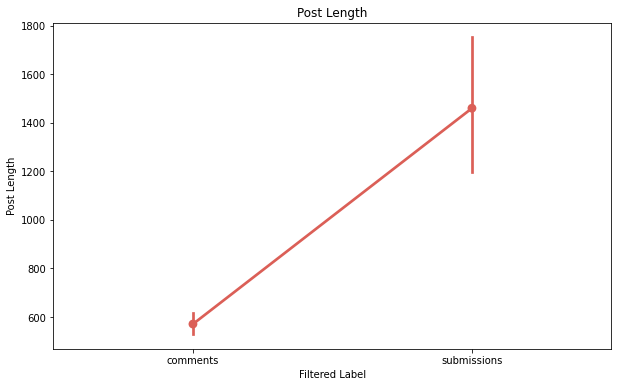

In [ ]:
#Length of the posts vs comments
plt.figure(figsize=(10, 6))
sns.pointplot(x = "Type", y = "post_len", data = data)
plt.xlabel("Type")
plt.ylabel("Post Length")
plt.title("Post Length")
plt.show()

The post length of submissions tend to be longer than that of comments.

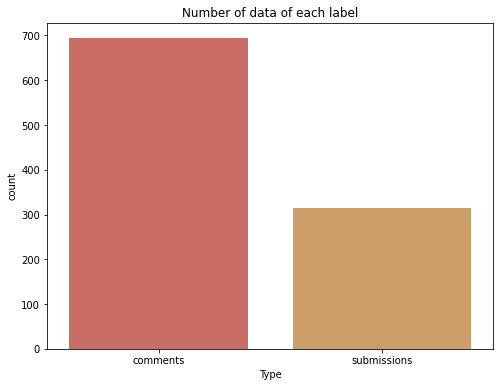

In [ ]:
#Count of the Posts for Each type
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=data)
plt.xlabel("Type")
plt.title("Number of posts of each type")
plt.show()

The number of comments are far more than the number of submissions.

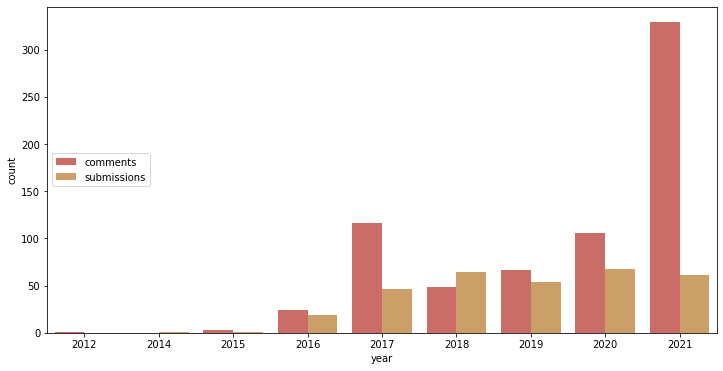

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=data, x='year', hue='Type', ax=ax)
plt.legend(loc='center left')

Much more comments under the submissions with key words instagram/algorithm happened in the 2021

In [ ]:
# assign two types of data into two dataframe
df_comments = data[data['Type'] == 'comments']
df_submissions = data[data['Type'] == 'submissions']

In [ ]:
# group the DataFrames by year and calculate the mean value for each year
grouped_comments = df_comments.groupby('year').mean()
grouped_submissions = df_submissions.groupby('year').mean()

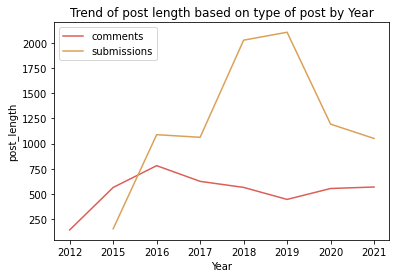

In [ ]:
# plot the data using matplotlib
plt.plot(grouped_comments.index, grouped_comments['post_len'], label='comments')
plt.plot(grouped_submissions.iloc[1:, :].index, grouped_submissions.iloc[1:, :]['post_len'], label='submissions')
# add a title and labels to the plot
plt.title('Trend of mean value of post length based on type of post by Year')
plt.xlabel('Year')
plt.ylabel('post_length')

# add a legend to the plot
plt.legend()

# display the plot
plt.show()

In the mid of 2015, the mean value of post_length for submissions exceeded the mean value of post_length for comments and reached the peak in 2019.

# **AWS Comprehend**

In [ ]:
# !pip install boto3
import json
import boto3

#Using boto3 to call the Comprehend API
client = boto3.client('comprehend', region_name='us-west-2',
                      aws_access_key_id='', #update key
                      aws_secret_access_key='' #update key
                      #aws_session_token=''
                      )

In [ ]:
from pandas._libs.lib import fast_unique_multiple_list_gen
#Lambda function to work with Comprehend
def lambda_handler(text):

  #Sentiment Analysis
  try:
    sentiment = client.detect_sentiment(Text = text, LanguageCode = 'en') #API call for sentiment analysis
  except:
    return "Cannot Calculate"
  sentRes = sentiment['Sentiment'] #Positive, Neutral, or Negative

  return sentRes

In [ ]:
data["sentiment"] = data.iloc[:,1].apply(lambda_handler)

# Cleaning Data

This data is a bit of a mess. We are going to take the "clear-cut" labels, aka strictly *problem* or strictly *sensemaking*. Including *ad* seems to reduce accuracy, likely due to the low amount of labeled examples while increasing number of classes. Keeping this binary seems appropriate for the level of data we have.

In [ ]:
options = ['problem', 'sensemaking'] 
    
# selecting rows based on condition 
d = data[data['label'].isin(options)] 
d = d[["Post","Subreddit","label","Date", "sentiment","Type"]]
d = d[['Post', 'Subreddit', 'Date', 'Type', "sentiment", 'label']]
#d.rename(columns = {"label": "label"}, 
#          inplace = True)
print(len(d))
d.head()

905


,Post,Subreddit,Date,Type,sentiment,label
1754,the instagram algorithm has a time-from-image-...,AskReddit,2012-04-08 19:59:20,comments,NEUTRAL,sensemaking
313,Since Instagram took the social media world by...,socialmedia,2014-09-12 20:58:19,submissions,NEUTRAL,sensemaking
312,Did instagram change their algorithm yesterday...,Instagram,2015-08-28 11:57:23,submissions,NEUTRAL,problem
1768,[Quick Google search doesn't show anything imp...,Entrepreneur,2015-04-13 13:58:37,comments,NEUTRAL,problem
1767,"First and foremost, you either gotta stick it ...",photography,2015-11-30 11:00:54,comments,NEGATIVE,sensemaking


In [ ]:
d = d[d['sentiment'] != 'Cannot Calculate']

In [ ]:
#dummy variable encoding
d = d.join(pd.get_dummies(d['sentiment']))

#Distribution of Labels

In [ ]:
#adding some more features to the dataset
d['post_len'] = d['Post'].astype(str).apply(len)
d['word_count'] = d['Post'].apply(lambda x: len(str(x).split()))

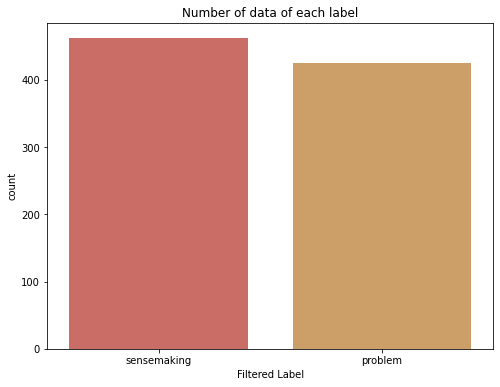

In [ ]:
#Count of the Posts for Each Label
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=d)
plt.xlabel("Label")
plt.title("Number of data of each label")
plt.show()

The number of labels in two categories is balanced

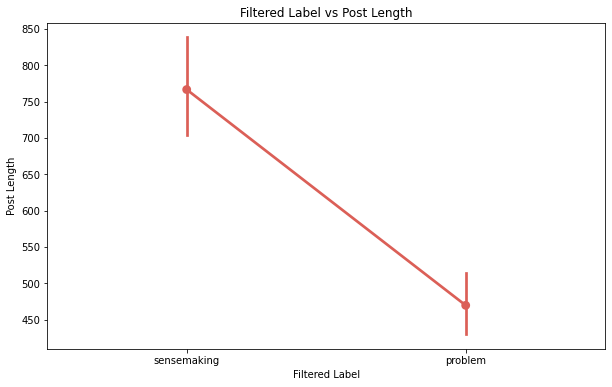

In [ ]:
#Length of the Post vs the Label
plt.figure(figsize=(10, 6))
sns.pointplot(x = "label", y = "post_len", data = d)
plt.xlabel("Label")
plt.ylabel("Post Length")
plt.title("Label vs Post Length")
plt.show()

The post_length with sensemaking label tend to longer than the post_length in problem label, which can be added as a feature.

# Descriptive stats

In [ ]:
# create a contingency table of the two variables
contingency_table = pd.crosstab(d['Type'], d['label'])

# calculate summary statistics for each row and column of the contingency table
row_totals = contingency_table.sum(axis=1)
column_totals = contingency_table.sum(axis=0)
grand_total = contingency_table.sum().sum()

# calculate the proportion of each cell in the contingency table
proportions = contingency_table / grand_total

# print the contingency table, row and column totals, and proportions
print("Contingency Table:")
print(contingency_table)

print("\nRow Totals:")
print(row_totals)

print("\nColumn Totals:")
print(column_totals)

print("\nProportions:")
print(proportions)

Contingency Table:
label        problem  sensemaking
Type                             
comments         252          397
submissions      173           65

Row Totals:
Type
comments       649
submissions    238
dtype: int64

Column Totals:
label
problem        425
sensemaking    462
dtype: int64

Proportions:
label         problem  sensemaking
Type                              
comments     0.284104     0.447576
submissions  0.195039     0.073281


The posts that are submissions have larger proportions of labels as problem compared to the sensemaking label. But the posts are problem have larger proportions of labels as sensemaking than the problem label.

# Balanced Classes 

In [ ]:
d['label'].value_counts()

sensemaking    462
problem        425
Name: label, dtype: int64

The labels are balanced.

# Top Features

In [ ]:
tfidf_top_words_post = []
tfidf_top_words_post.append(d[d['label'] == 'sensemaking']['Post'].str.cat(sep=' '))
tfidf_top_words_post.append(d[d['label'] == 'problem']['Post'].str.cat(sep=' '))

tfidf_top_words_label = ['sensemaking', 'problem']

tfidf_top_words = pd.DataFrame(tfidf_top_words_post, tfidf_top_words_label).reset_index()
tfidf_top_words.columns = ['label', 'post']

In [ ]:
def get_tfidf_top_features(documents,n_top=5000):
  tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=1,  stop_words='english')
  tfidf = tfidf_vectorizer.fit_transform(documents)
  tfidf_sensemaking = tfidf[0]
  tfidf_problem = tfidf[1]

  importance_sensemaking = np.argsort(np.asarray(tfidf_sensemaking.mean(axis=0)).ravel())[::-1]
  importance_problem = np.argsort(np.asarray(tfidf_problem.mean(axis=0)).ravel())[::-1]

  tfidf_feature_names = np.array(tfidf_vectorizer.get_feature_names())

  return tfidf_feature_names[importance_sensemaking[:n_top]], tfidf_feature_names[importance_problem[:n_top]]

In [ ]:
top_words_sensemaking, top_words_problem = get_tfidf_top_features(tfidf_top_words['post'])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
top_words_sensemaking

array(['caption', 'iginstant', 'rank', ..., 'rewarding', 'rewarded',
       'shock'], dtype='<U50')

In [ ]:
top_words_problem

array(['car', 'appreciate', 'ass', ..., 'moral', 'mood', '00'],
      dtype='<U50')

# Feature Engineering & Data Cleaning

In [ ]:
d = d.reset_index(drop=True)

In [ ]:
import re

def count_and_remove_urls(text):
    url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    urls = re.findall(url_pattern, text)
    count = len(urls)
    text_without_urls = re.sub(url_pattern, '', text)
    return count, text_without_urls

d['url_count'], d['post_cleaned'] = zip(*d['Post'].apply(count_and_remove_urls))

In [ ]:
def count_and_remove_question_marks(text):
    count = text.count('?')
    text_without_question_marks = text.replace('?', '')
    return count, text_without_question_marks

d['question_mark_count'], d['post_cleaned'] = zip(*d['post_cleaned'].apply(count_and_remove_question_marks))


In [ ]:
#function to remove punctuations
d['post_cleaned'] = d['post_cleaned'].str.replace('[^\w\s]', '')
d['post_cleaned'].head()

<ipython-input-38-be5f8aeb2bf1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  d['post_cleaned'] = d['post_cleaned'].str.replace('[^\w\s]', '')


0    the instagram algorithm has a timefromimagecap...
1    Since Instagram took the social media world by...
2    Did instagram change their algorithm yesterday...
3    Quick Google search doesnt show anything impor...
4    First and foremost you either gotta stick it o...
Name: post_cleaned, dtype: object

In [ ]:
#function to remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
d['post_cleaned'] = d['post_cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
d['post_cleaned'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    instagram algorithm timefromimagecapture varia...
1    Since Instagram took social media world storm ...
2    Did instagram change algorithm yesterday My po...
3    Quick Google search doesnt show anything impor...
4    First foremost either gotta stick spread word ...
Name: post_cleaned, dtype: object

In [ ]:
#function to perform lemmatization/stemming

from nltk.stem import PorterStemmer
st = PorterStemmer()
d['post_cleaned'] = d['post_cleaned'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
d['post_cleaned']

0      instagram algorithm timefromimagecaptur variab...
1      sinc instagram took social media world storm i...
2      did instagram chang algorithm yesterday my pos...
3      quick googl search doesnt show anyth import en...
4      first foremost either gotta stick spread word ...
                             ...                        
882    ha instagram algorithm algorithm gener user po...
883    i think type giveaway reason ig algorithm take...
884    i keep read ig algorithm right theyr realli pu...
885    i think afford time dont want take break often...
886    as product focus instagram page consid instagr...
Name: post_cleaned, Length: 887, dtype: object

In [ ]:
# Define a function to count words in a string
def count_words(text):
    words = text.split()
    return len(words)

# Apply the count_words function to the 'text_column' column
d['word_count'] = d['post_cleaned'].apply(count_words)

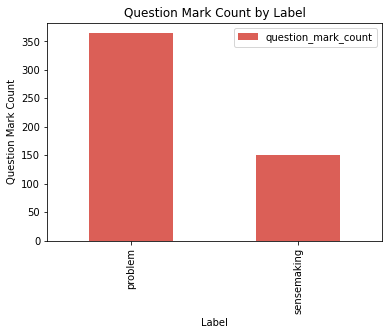

In [ ]:
import matplotlib.pyplot as plt

d[['label', 'question_mark_count']].groupby('label').sum().plot(kind = 'bar')

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Question Mark Count')
plt.title('Question Mark Count by Label')

# Show plot
plt.show()


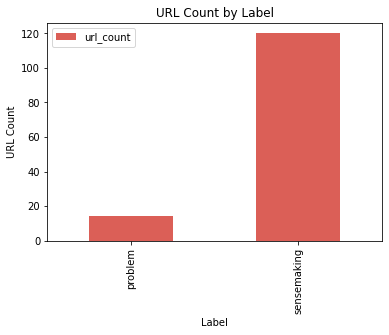

In [ ]:
import matplotlib.pyplot as plt

d[['label', 'url_count']].groupby('label').sum().plot(kind = 'bar')

# Add labels and title
plt.xlabel('Label')
plt.ylabel('URL Count')
plt.title('URL Count by Label')

# Show plot
plt.show()


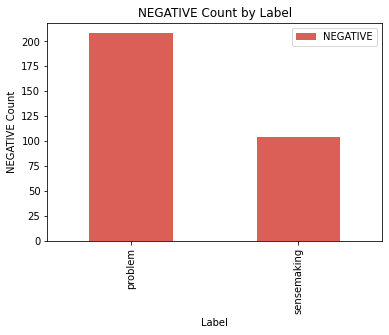

In [ ]:
import matplotlib.pyplot as plt

d[['label', 'NEGATIVE']].groupby('label').sum().plot(kind = 'bar')

# Add labels and title
plt.xlabel('Label')
plt.ylabel('NEGATIVE Count')
plt.title('NEGATIVE Count by Label')

# Show plot
plt.show()

# Preprocessing Posts

In [ ]:
# Function to extract only matching words from a sentence
def extract_matching_words(sentence, word_list):
    return ' '.join([word for word in sentence.split() if word in word_list])

d.loc[d['label'] == 'problem', 'post_reduced'] = d['post_cleaned'].apply(extract_matching_words, word_list=top_words_problem)
d.loc[d['label'] == 'sensemaking', 'post_reduced'] = d['post_cleaned'].apply(extract_matching_words, word_list=top_words_sensemaking)

# TF-IDF Pre-Processing

In [ ]:
def extract_features(df,field,training_data,testing_data,type="counts"):
    """Extract features using different methods"""
    
    # the 'field' we are taking in is Post -- but we could add more features
    
    if "binary" in type:
        
        # BINARY FEATURE REPRESENTATION
        cv= CountVectorizer(binary=True, max_df=0.95)
        cv.fit_transform(training_data[field].values)
        
        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,cv
  
    elif "counts" in type:
        
        # COUNT BASED FEATURE REPRESENTATION
        cv= CountVectorizer(binary=False, max_df=0.95)
        cv.fit_transform(training_data[field].values)
        
        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,cv
    

## Train Test Split

In [ ]:
#backup
d_bkp = d
# d = d_bkp

In [ ]:
d

,Post,Subreddit,Date,Type,sentiment,label,MIXED,NEGATIVE,NEUTRAL,POSITIVE,url_count,post_cleaned,question_mark_count,word_count,post_reduced
0,the instagram algorithm has a time-from-image-...,AskReddit,2012-04-08 19:59:20,comments,NEUTRAL,sensemaking,0,0,1,0,0,instagram algorithm timefromimagecaptur variab...,0,12,yellow fade
1,Since Instagram took the social media world by...,socialmedia,2014-09-12 20:58:19,submissions,NEUTRAL,sensemaking,0,0,1,0,1,sinc instagram took social media world storm i...,0,41,storm ive thorough inner ive
2,Did instagram change their algorithm yesterday...,Instagram,2015-08-28 11:57:23,submissions,NEUTRAL,problem,0,0,1,0,0,did instagram chang algorithm yesterday my pos...,2,19,
3,[Quick Google search doesn't show anything imp...,Entrepreneur,2015-04-13 13:58:37,comments,NEUTRAL,problem,0,0,1,0,1,quick googl search doesnt show anyth import en...,1,24,doesnt differ slowdown server
4,"First and foremost, you either gotta stick it ...",photography,2015-11-30 11:00:54,comments,NEGATIVE,sensemaking,0,1,0,0,0,first foremost either gotta stick spread word ...,1,99,foremost mouth cheat aim ive photograph trend ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,"Has to do with the Instagram algorithm, the al...",InstagramMarketing,2021-08-15 13:03:45,comments,MIXED,sensemaking,1,0,0,0,0,ha instagram algorithm algorithm gener user po...,0,48,invalid doesnt jt
883,I think this types of giveaways are a reason w...,blogsnark,2021-02-09 17:09:22,comments,NEUTRAL,problem,0,0,1,0,0,i think type giveaway reason ig algorithm take...,0,15,giveaway
884,I keep reading about the IG algorithm right no...,Instagram,2021-02-10 14:17:06,comments,POSITIVE,sensemaking,0,0,0,1,0,i keep read ig algorithm right theyr realli pu...,2,86,pokémon hip hop
885,"I think they can afford time off, they just do...",blogsnark,2021-01-23 1:36:26,comments,NEGATIVE,sensemaking,0,1,0,0,0,i think afford time dont want take break often...,0,29,afford rank


In [ ]:
d = d[['post_cleaned', 'url_count', 'question_mark_count', 'MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE', 'label', 'word_count']]


In [ ]:
training_data, testing_data = train_test_split(d,test_size=0.25,random_state = 2000)
Y_train=training_data['label'].values
Y_test=testing_data['label'].values
     
# GET FEATURES
X_train,X_test,feature_transformer=extract_features(d,"post_cleaned",training_data,testing_data,type='counts')


In [ ]:
from scipy import sparse

training_data = training_data[['url_count', 'question_mark_count', 'MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE', 'word_count']]
testing_data = testing_data[['url_count', 'question_mark_count', 'MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE', 'word_count']]

X_train = sparse.hstack([training_data, X_train]).tocsr()
X_test = sparse.hstack([testing_data, X_test]).tocsr()

## Logistic Regression

In [ ]:
scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model=scikit_log_reg.fit(X_train,Y_train)

[LibLinear]

In [ ]:
# for logistic regression, it gives you a probability for each label. 
# We are only interested in the most probable label for now, since there are only two labels
# therefore our top_k is 1
def get_top_k_predictions(model,X_test,k):
    
    # get probabilities instead of predicted labels, since we want to collect top 3
    probs = model.predict_proba(X_test)
    # GET TOP K PREDICTIONS BY PROB - note these are just index
    best_n = np.argsort(probs, axis=1)[:,-k:]

    # GET CATEGORY OF PREDICTIONS
    preds=[[model.classes_[predicted_cat] for predicted_cat in prediction] for prediction in best_n]

    # REVERSE CATEGORIES - DESCENDING ORDER OF IMPORTANCE
    preds=[ item[::-1] for item in preds]
    
    return preds

# Y Test vs Predicted Labels

In [ ]:
top_k = 1

# GET TOP K PREDICTIONS
preds=get_top_k_predictions(model,X_test,top_k)
    
# GET PREDICTED VALUES AND GROUND TRUTH INTO A LIST OF LISTS    
result = pd.DataFrame(Y_test,columns=['test'])
result['pred'] = preds
result

,test,pred
0,problem,[sensemaking]
1,problem,[problem]
2,sensemaking,[sensemaking]
3,sensemaking,[sensemaking]
4,problem,[sensemaking]
...,...,...
217,sensemaking,[problem]
218,problem,[problem]
219,problem,[problem]
220,sensemaking,[problem]


# Evaluation (Accuracy)

In [ ]:
# GET EVALUATION NUMBERS ON TEST SET -- HOW DID WE DO?
print(accuracy_score(Y_test, preds))
cm = confusion_matrix(Y_test,preds)

f1_score(Y_test, preds, average='micro')

0.7612612612612613


0.7612612612612613

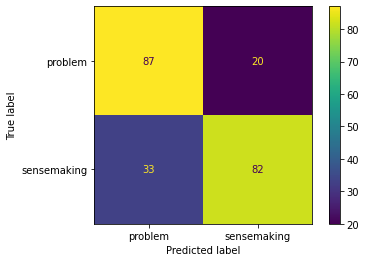

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

# Cross Validation
How well could we conceivably do? Looks like we have the potential for 93% accuracy, likely if we get more data

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(scikit_log_reg, X_train, Y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Cross-Validation Accuracy Scores [0.73134328 0.7761194  0.73134328 0.7761194  0.74626866 0.78787879
 0.74242424 0.75757576 0.74242424 0.72727273]


In [ ]:
scores.mean()

0.7518769787426505

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train the Naive classifier
nb_classifier = MultinomialNB(alpha = .05)
nb_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = np.mean(y_pred == Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7567567567567568


# **Random Forest**

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = np.mean(y_pred == Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8063063063063063


# **XGBoost**

In [ ]:
import numpy as np
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(Y_train)
y_test = le.fit_transform(Y_test)

# Train the XGBoost classifier
clf = XGBClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7837837837837838
